In [68]:
import contextily as ctx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/paris_restaurants.csv')
df.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


In [52]:
restaurants = gpd.GeoDataFrame(df,
                               geometry=gpd.points_from_xy(df.x, df.y))
restaurants.head()

,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)


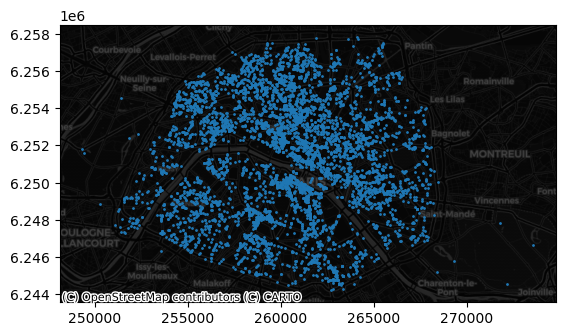

In [59]:
ax = restaurants.plot(markersize=1)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

In [ ]:
ctx.providers

In [55]:
restaurants.groupby(by='type').size()

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64

In [56]:
restaurants.to_file('paris_restaurants.geojson', driver='GeoJSON')

In [67]:
asian_restaurants = restaurants[restaurants['type'] == 'Asian restaurant']
len(asian_restaurants)

1642

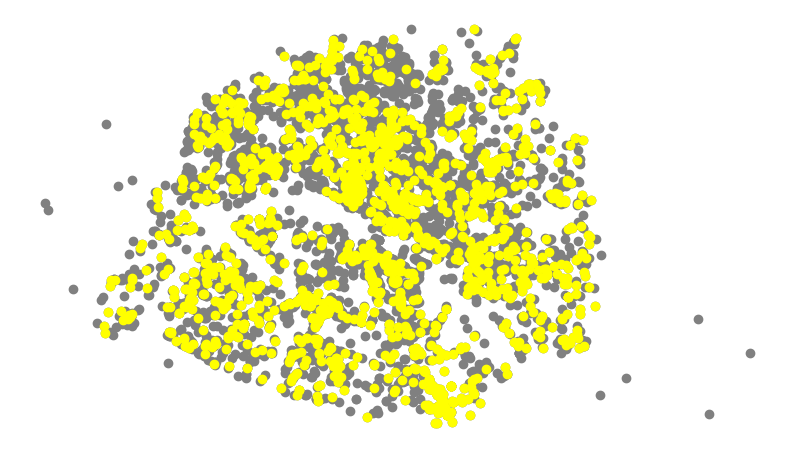

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))

restaurants.plot(ax=ax, color='grey')
asian_restaurants.plot(ax=ax, color='yellow')
ax.set_axis_off()